In [22]:
# import required libraries
import numpy as np
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# loading files
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer (1).csv


In [24]:
# reading csv file into the dataframe
diag_df = pd.read_csv('breast-cancer.csv')
diag_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
# checking data types of columns in dataframe
diag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [26]:
# encoding diagnosis column to binary
encoder = LabelEncoder()
diag_df['diagnosis'] = encoder.fit_transform(diag_df['diagnosis'])
diag_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
# checking label encoder results
diag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [28]:
# setting the feature(X) and the target(y) datasets
X = diag_df.drop(columns='diagnosis').copy()
y = diag_df['diagnosis']
display(X.head())
display(y.head())

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [29]:
# splitting features and targets into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y)
# scaling the training and testing datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [30]:
# setting the Logistic Regression model and fitting the training data
lr = LogisticRegression(random_state=1)
lr_model = lr.fit(X_train_scaled, y_train)

In [31]:
# making predictions from the model
lr_train_predictions = lr_model.predict(X_train_scaled)
lr_test_predictions = lr.predict(X_test_scaled)

In [32]:
# creating a confusion matrix for the Logistic Regression
lr_train_matrix =  confusion_matrix(y_train, lr_train_predictions)
lr_train_matrix

array([[261,   2],
       [  4, 159]])

[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual'),
 Text(0.5, 1.0, 'Logistic Regression Training Confusion Matrix')]

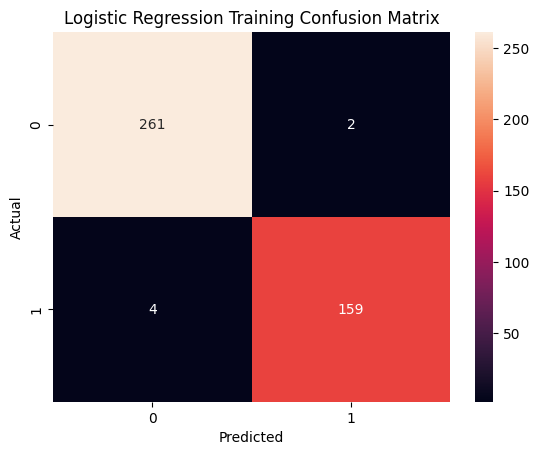

In [33]:
# plotting the training confusion matrix using seborn
axlr_train = sns.heatmap(lr_train_matrix, annot = True, fmt = f'')
axlr_train.set(xlabel='Predicted', ylabel='Actual', title='Logistic Regression Training Confusion Matrix')

In [34]:
# Create and save the confustion matrix for the testing data
lr_test_matrix = confusion_matrix(y_test, lr_test_predictions)

# Print the confusion matrix for the testing data
print(lr_test_matrix)

[[92  2]
 [ 1 48]]


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual'),
 Text(0.5, 1.0, 'Logistic Regression Testing Confusion Matrix')]

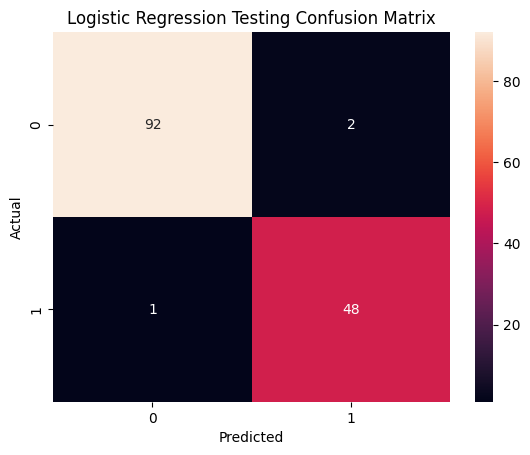

In [35]:
# plotting the testing confusion matrix using seborn
axlr_test = sns.heatmap(lr_test_matrix, annot = True, fmt = f'')
axlr_test.set(xlabel='Predicted', ylabel='Actual', title='Logistic Regression Testing Confusion Matrix')

In [36]:
# Creating the classification reports for the training and testing datasets
lr_train_report = classification_report(y_train, lr_train_predictions)
lr_test_report = classification_report(y_test, lr_test_predictions)
# printing the classification reports
print('Logistic Regression Model Training Classification Report')
print('--------------------------------------------------------')
print(lr_train_report)
print('________________________________________________________')
print('')
print('Logistic Regression Model Testing Classification Report')
print('--------------------------------------------------------')
print(lr_test_report)

Logistic Regression Model Training Classification Report
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       263
           1       0.99      0.98      0.98       163

    accuracy                           0.99       426
   macro avg       0.99      0.98      0.99       426
weighted avg       0.99      0.99      0.99       426

________________________________________________________

Logistic Regression Model Testing Classification Report
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        94
           1       0.96      0.98      0.97        49

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [37]:
# setting up an XG Boost Classifier model
xgb = XGBClassifier()
xgb_model = xgb.fit(X_train_scaled, y_train)

In [38]:
xgb_train_predictions = xgb_model.predict(X_train_scaled)
xgb_test_predictions = xgb.predict(X_test_scaled)

In [39]:
# Creating the Confusion Matrix for the XGB model
xgb_train_matrix =  confusion_matrix(y_train, xgb_train_predictions)

print(xgb_train_matrix)

xgb_test_matrix = confusion_matrix(y_test, xgb_test_predictions)

print(xgb_test_matrix)

[[263   0]
 [  0 163]]
[[93  1]
 [ 2 47]]


[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual'),
 Text(0.5, 1.0, 'XGBoost Classifier Training Confusion Matrix')]

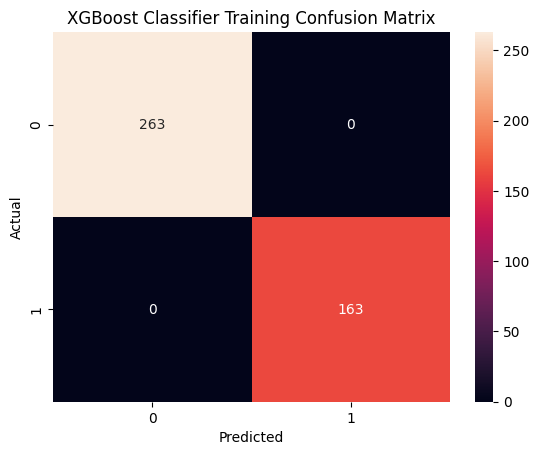

In [40]:
# plotting the training confusion matrix using seborn
axxgb_train = sns.heatmap(xgb_train_matrix, annot = True, fmt = f'')
axxgb_train.set(xlabel='Predicted', ylabel='Actual', title='XGBoost Classifier Training Confusion Matrix')

[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'Actual'),
 Text(0.5, 1.0, 'XGBoost Classifier Testing Confusion Matrix')]

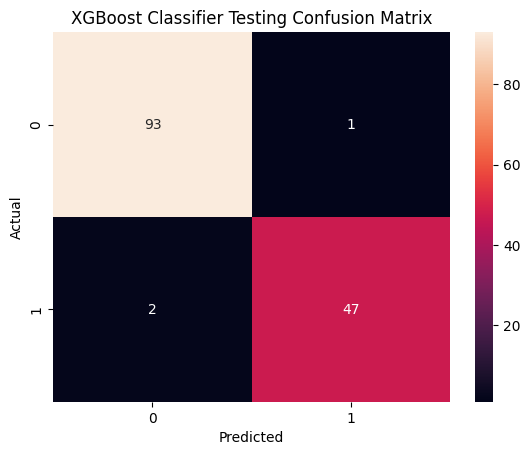

In [41]:
# plotting the testing confusion matrix using seborn
axxgb_test = sns.heatmap(xgb_test_matrix, annot = True, fmt = f'')
axxgb_test.set(xlabel='Predicted', ylabel='Actual', title='XGBoost Classifier Testing Confusion Matrix')

In [42]:
xgb_train_report = classification_report(y_train, xgb_train_predictions)
xgb_test_report = classification_report(y_test, xgb_test_predictions)
# printing the classification reports
print('XGB Classifier Model Training Classification Report')
print('--------------------------------------------------------')
print(xgb_train_report)
print('________________________________________________________')
print('')
print('XGB Classifier Model Testing Classification Report')
print('--------------------------------------------------------')
print(xgb_test_report)

XGB Classifier Model Training Classification Report
--------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       163

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

________________________________________________________

XGB Classifier Model Testing Classification Report
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.98      0.96      0.97        49

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143

